### Data Preparation

In [33]:
### import libararies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [34]:
### load the dataset

df = pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease')

In [35]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


### EDA

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [37]:
### summarize

df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [38]:
### finding null values

df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [39]:
df["oldpeak"].unique()

array([ 2.3,  0. ,  0.4,  1.5,  1. ,  nan,  2.6,  0.5,  1.2,  3.5,  1.4,
        1.1,  0.6,  2. ,  1.6,  0.1,  0.3,  1.3,  0.2,  2.4,  1.8,  3. ,
        0.8,  1.9,  0.9,  0.7,  4.2, -0.5, -0.1, -1.1,  2.1,  3.6,  1.7,
        3.1,  2.2,  2.5,  2.8, -1.5, -0.9, -2.6, -0.8,  4. ,  5. , -1. ,
        3.4, -2. , -0.7,  3.2,  6.2,  5.6,  2.9,  3.7,  4.4,  3.8])

In [40]:
### imputing median fillna

df["oldpeak"]=df["oldpeak"].fillna(df["oldpeak"].median())

In [43]:
### there is 0 value in chol,tresttbps which is medically not possible so we have to iumpute median for zero

df["trestbps"]=df["trestbps"].replace(0,np.nan)

df["chol"]=df["chol"].replace(0,np.nan)

In [66]:
### replace nan with median

df["trestbps"]=df["trestbps"].fillna(df["trestbps"].median())

df["chol"]=df["chol"].fillna(df["trestbps"].median())

In [67]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.573789,226.110132,135.957048,0.864537,1.008811
std,9.158031,19.914538,72.314843,26.804929,1.060433,1.144436
min,29.000000,80.000000,85.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


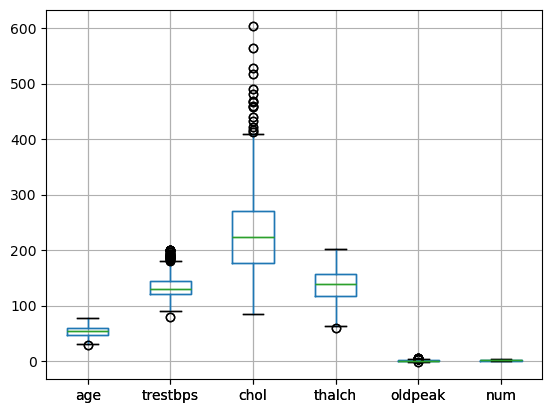

In [69]:
### Boxplot

df.boxplot()
plt.show()

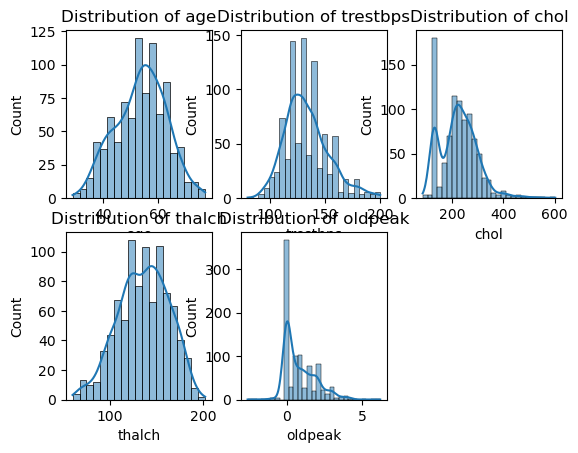

In [70]:
### histogram

num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.show()

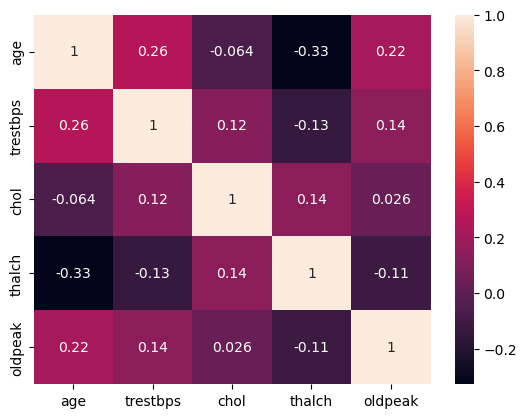

In [71]:
### Correaltion
num_col=df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']]

corr = num_col.corr()
sns.heatmap(corr,annot=True)
plt.show()

### Feature Engineering

In [72]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Check for '?' or 'None' in objects
for col in categorical_cols:
    print(f"{col} unique values: {df[col].unique()}")

sex unique values: ['Male' 'Female']
cp unique values: ['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']
fbs unique values: ['True' 'False']
restecg unique values: ['lv hypertrophy' 'normal' 'st-t abnormality']
exang unique values: ['False' 'True' 'FALSE' 'TURE']
slope unique values: ['downsloping' 'flat' 'upsloping']
thal unique values: ['fixed defect' 'normal' 'reversable defect']


In [73]:
### Convert boolean/object to string for consistent one-hot

df[categorical_cols] = df[categorical_cols].astype(str)

In [74]:
df_encoded = pd.get_dummies(df.drop(['num'], axis=1), columns=categorical_cols, drop_first=True)

In [75]:
df_encoded

,age,trestbps,chol,thalch,oldpeak,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_False,exang_TURE,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145.0,233.0,150,2.3,True,False,False,True,True,False,False,True,False,False,False,False,False,False
1,41,135.0,203.0,132,0.0,True,True,False,False,False,True,False,True,False,False,True,False,False,False
2,57,140.0,192.0,148,0.4,True,False,False,False,False,True,False,True,False,False,True,False,False,False
3,52,118.0,186.0,190,0.0,True,False,False,True,False,False,False,True,False,False,True,False,False,False
4,57,110.0,201.0,126,1.5,True,False,False,False,False,True,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125.0,130.0,120,1.5,True,False,False,False,False,True,False,True,False,False,False,True,True,False
904,62,166.0,170.0,120,3.0,True,False,False,False,False,False,True,False,False,True,True,False,False,True
905,56,170.0,130.0,123,2.5,True,False,True,False,False,False,False,False,False,True,False,False,False,True
906,56,144.0,208.0,105,0.5,True,False,True,False,True,False,True,False,True,False,False,False,False,True


In [76]:
df["chol"].unique()

array([233., 203., 192., 186., 201., 228., 276., 211., 260., 175., 237.,
       226., 273., 197., 240., 250., 177., 248., 265., 303., 149., 234.,
       160., 264., 242., 302., 278., 220., 294., 394., 214., 219., 271.,
       213., 245., 196., 209., 141., 340., 318., 243., 238., 222., 208.,
       236., 178., 275., 308., 223., 204., 269., 256., 180., 360., 239.,
       235., 262., 257., 295., 417., 212., 254., 283., 244., 315., 306.,
       342., 267., 198., 215., 304., 247., 266., 252., 277., 325., 246.,
       182., 168., 255., 195., 199., 253., 321., 157., 183., 205., 210.,
       288., 354., 221., 268., 261., 216., 439., 270., 310., 130., 231.,
       258., 227., 564., 193., 298., 263., 313., 309., 232., 126., 207.,
       179., 458., 188., 297., 184., 128., 224., 229., 328., 347., 171.,
       274., 200., 365., 206., 163., 187., 241., 251., 481., 459., 218.,
       284., 190., 432., 280., 468., 230., 292., 312., 330., 129., 217.,
       272.,  85., 225., 307., 329., 166., 202., 14

In [79]:
# 1. Create the 'target' column by converting 'num' to binary (0 or 1)
# num > 0 means heart disease is present (1), num = 0 means it is not (0)
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

### Decision Tree Classification

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,precision_score,recall_score

In [86]:
### splitting into feature and target

feature = df_encoded
target = df["target"]

In [87]:
### splitting into training and testing

x_train,x_test,y_train,y_test = train_test_split(feature,target,train_size=0.8,random_state=100,stratify=target)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(726, 19)
(182, 19)
(726,)
(182,)


In [88]:
### model building

d_tree = DecisionTreeClassifier(max_depth=3)
d_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [89]:
### y pred

y_pred = d_tree.predict(x_test)
y_pred

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0])

In [93]:
### model evaluation

metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-Score": f1_score(y_test, y_pred),
}

print("metrics :",metrics)

metrics : {'Accuracy': 0.7362637362637363, 'Precision': 0.75, 'Recall': 0.7941176470588235, 'F1-Score': 0.7714285714285715}


### Hyperparameter Tuning

In [95]:
from sklearn.model_selection import GridSearchCV

In [94]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [97]:
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [98]:
best_dt = grid_search.best_estimator_
print("\nBest Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}


In [101]:
# Evaluate Best Model
y_pred_best = best_dt.predict(x_test)

### Model Evaluation and Analysis

In [102]:
metrics_best = {
    "Accuracy": accuracy_score(y_test, y_pred_best),
    "Precision": precision_score(y_test, y_pred_best),
    "Recall": recall_score(y_test, y_pred_best),
    "F1-Score": f1_score(y_test, y_pred_best)
}

print("Optimized Model Metrics:", metrics_best)

Optimized Model Metrics: {'Accuracy': 0.7472527472527473, 'Precision': 0.7745098039215687, 'Recall': 0.7745098039215687, 'F1-Score': 0.7745098039215687}


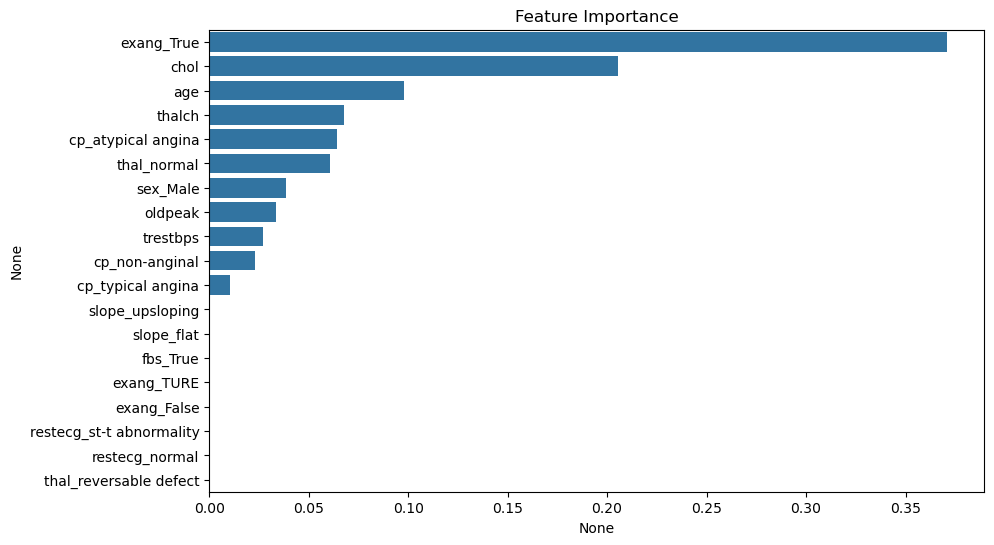

In [109]:
# Feature Importance
importances = pd.Series(best_dt.feature_importances_, index=df_encoded.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index)
plt.title('Feature Importance')
plt.show()

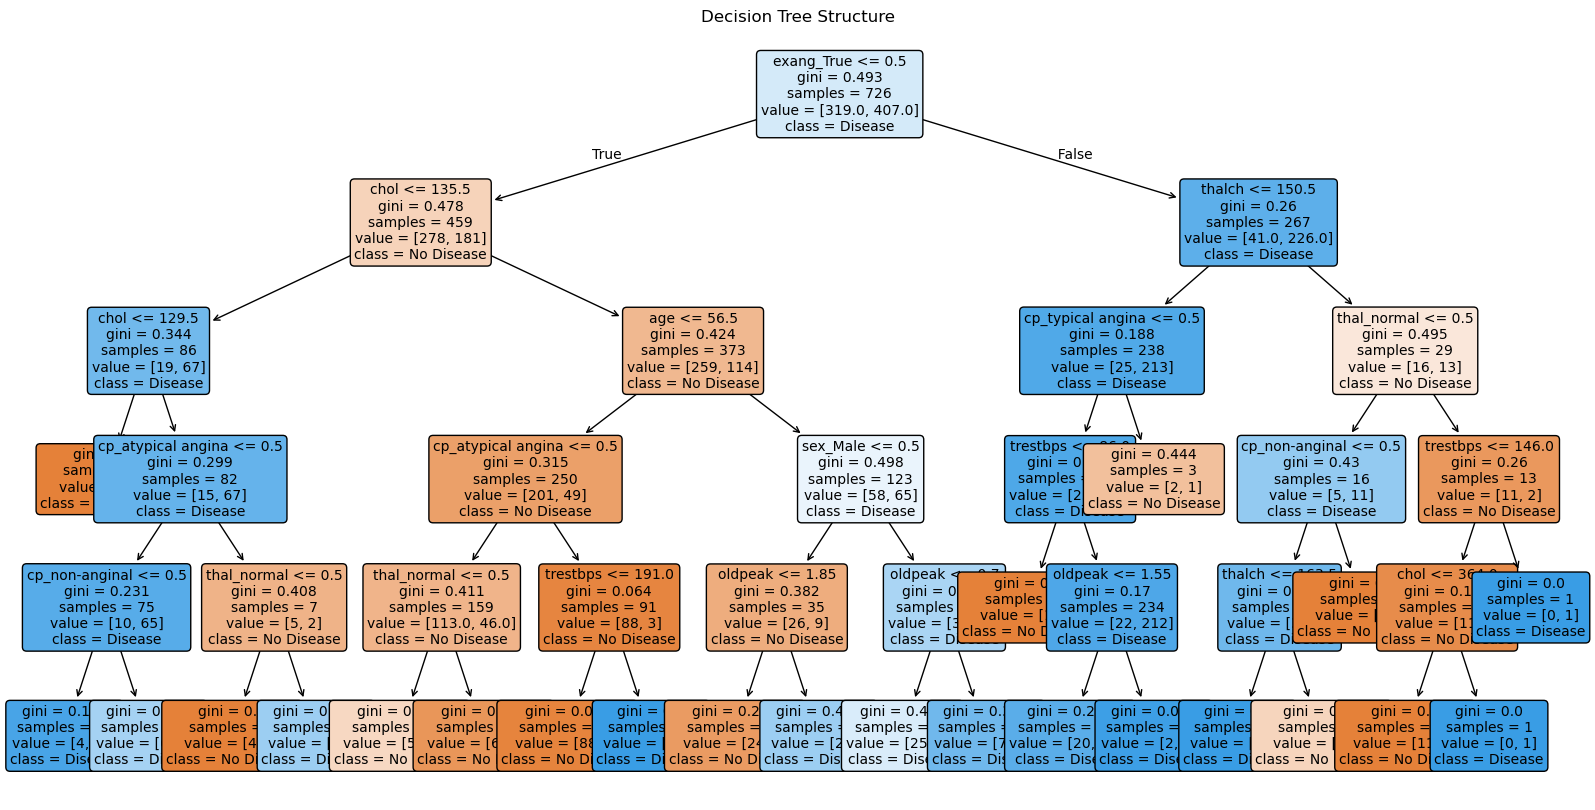

In [114]:
### Tree Structure

plt.figure(figsize=(20, 10))
plot_tree(best_dt, feature_names=df_encoded.columns, class_names=['No Disease', 'Disease'], filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Structure')
plt.show()